# Машиное Обучение
## Timeseries
### Хаммуд Обадах

 Importing required libraries

In [0]:
import math
import sys
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import pandas as pd
import statsmodels.api as sm
import matplotlib
import datetime
from pylab import rcParams
import warnings
import itertools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
#plt.plot(X)

 reading data & set plot to show the data along time

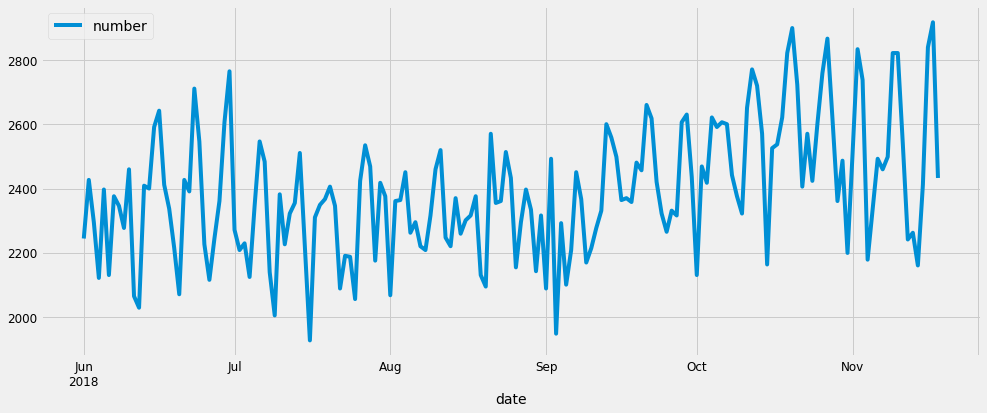

In [0]:
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_csv("active_cleaners.csv")
#It's necessary to show the months under the plot, because the date time isn't recognized
df['date']=df['date'].astype('datetime64[ns]')
df=df.set_index('date')
df.plot(figsize=(15, 6))
plt.savefig("data.png")
plt.show()

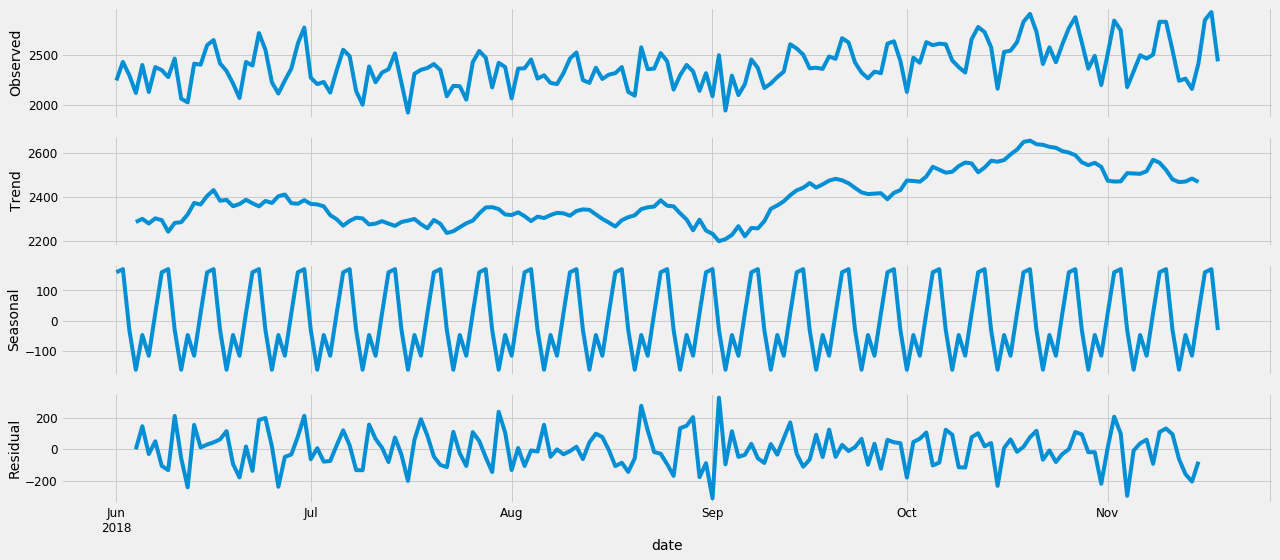

In [0]:
#decompose into the components
#we can see that it's perfectly seasonal data
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.savefig("decomposition.png")
plt.show()

Split the data into testing and training

In [0]:
train=df[:'2018-09-01']
test=df['2018-09-01':]

## ARIMA

Since the seasonal component is obviouse, we should use a Seasonal ARIMA model. to find the best parameters for Arima,we can perform a grid search over multiple values of p,d,q,P,D,and Q using the Akaike information criterion (AIC) (Which is an estimator of the relative quality of statistical models for a given set of data), and pick the parameters according th=o the miminal value
The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

Getting our predictions

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  171
Model:                    ARMA(20, 0)   Log Likelihood               -1083.048
Method:                       css-mle   S.D. of innovations            134.296
Date:                Wed, 26 Dec 2018   AIC                           2210.095
Time:                        22:35:29   BIC                           2279.212
Sample:                    06-01-2018   HQIC                          2238.140
                         - 11-18-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2387.9260     61.701     38.701      0.000    2266.994    2508.858
ar.L1.number      0.2388      0.077      3.108      0.002       0.088       0.389
ar.L2.number     -0.0121      0.079     

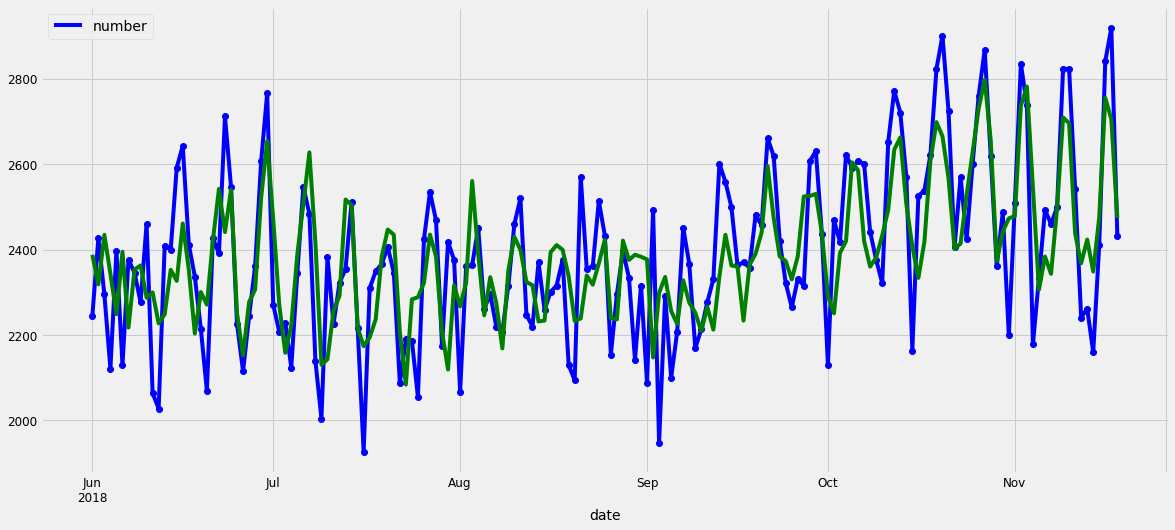

In [0]:
arima_data = ARIMA(df, order=(20,0,0))
fit1 = arima_data.fit(disp=-1)
df[:].plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot( color='green')
plt.savefig("ARIMA.png")
print(fit1.summary())

Calculate the absolute error:

In [0]:
pred = fit1.predict(start=pd.to_datetime('2018-09-01'))
b=test.values.reshape(1,-1)[0]
abb1 = (abs(pred - b)).mean()
print(abb1)

107.94151721727903


In [0]:
pred1 = fit1.predict(start=pd.to_datetime('2018-11-19') , end=pd.to_datetime('2018-11-25'))
print(pred1)

2018-11-19    2301.076104
2018-11-20    2257.675142
2018-11-21    2251.358386
2018-11-22    2491.290385
2018-11-23    2758.923531
2018-11-24    2748.569493
2018-11-25    2488.130684
Freq: D, dtype: float64


## Simple Exponential Smoothing

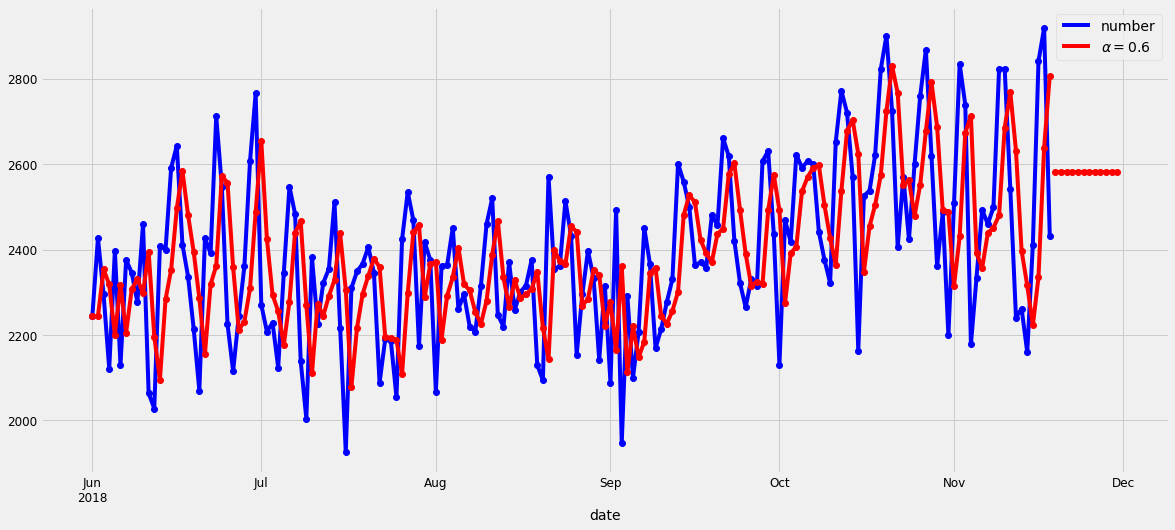

In [0]:
# Simple Exponential Smoothing
df[:].plot(marker='o', color='blue', legend=True)

fit2 = SimpleExpSmoothing(df).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')
plt.savefig("SES.png")
plt.show()

Calculate the absolute error:

In [0]:
pred = fit2.predict(start=pd.to_datetime('2018-09-01'))
b=test.values.reshape(1,-1)[0]
abb2 = (abs(pred - b)).mean()
print(abb2)

169.75161227515224


In [0]:
pred2 = fit2.predict(start=pd.to_datetime('2018-11-19') , end=pd.to_datetime('2018-11-25'))
print(pred2)

2018-11-19    2582.611628
2018-11-20    2582.611628
2018-11-21    2582.611628
2018-11-22    2582.611628
2018-11-23    2582.611628
2018-11-24    2582.611628
2018-11-25    2582.611628
Freq: D, dtype: float64


## Holt-Winter

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.
Applying HOLT_WINTER method

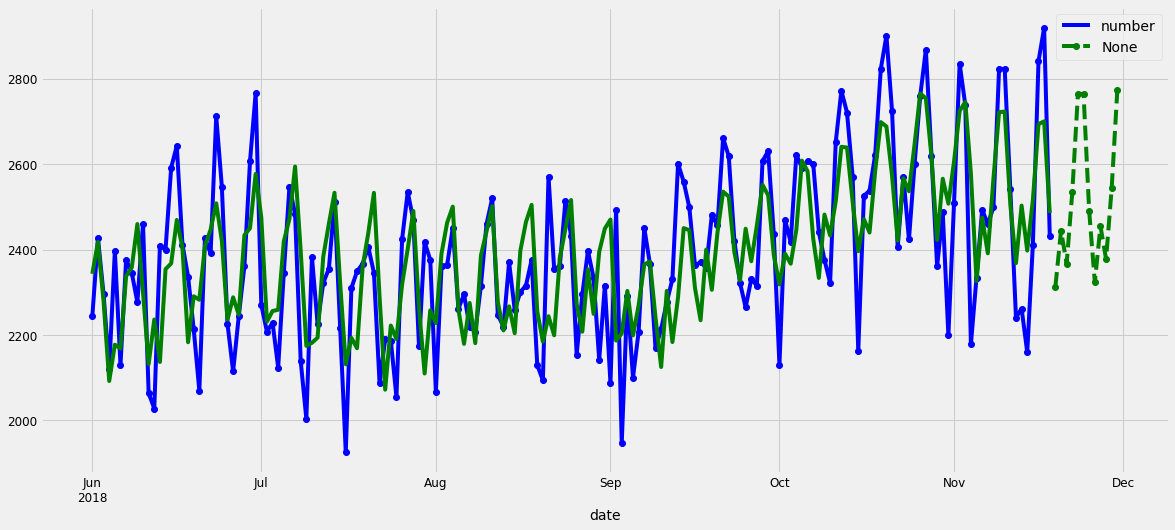

In [0]:
#holt-Winter
df[:].plot(marker='o', color='blue', legend=True)
fit3 = ExponentialSmoothing(df, seasonal_periods=7, trend='add', seasonal='add').fit()
fit3.fittedvalues.plot( color='green')
fit3.forecast(12).plot(style='--', marker='o', color='green', legend=True)
plt.savefig("HW.png")
plt.show()

Calculate the absolute error

In [0]:
pred = fit3.predict(start=pd.to_datetime('2018-09-01'))
a=df['number'].values
b=test.values.reshape(1,-1)[0]
c=pred.values
abb3 = (abs(pred - b)).mean()
print(abb3)

107.79034325202238


In [0]:
pred3 = fit3.predict(start=pd.to_datetime('2018-11-19') , end=pd.to_datetime('2018-11-25'))
print(pred3)

2018-11-19    2313.055601
2018-11-20    2444.458893
2018-11-21    2367.424268
2018-11-22    2534.127749
2018-11-23    2763.730918
2018-11-24    2764.569165
2018-11-25    2490.160523
Freq: D, dtype: float64


In [0]:
html_str = """
<center><h3>Timeseries</h3></center>
Out time series:<br />
<img src='data.png'  width=600><br />
<br />
data after decompostion:
<br />
<img src='decomposition.png'  width=600><br />
<br/ >
ARIMA:<br />
<img src='ARIMA.png'  width=600><br />
Absolute error= """+ str(abb1)+"""<br />
Predictions:<br />
"""+ str(pred1)+"""<br />
<br/>
Simple Exponential Smoothing:
<br />
<img src='SES.png' width=600><br />
Absolute error= """+ str(abb2)+"""<br />
Predictions:<br />
"""+ str(pred2)+"""<br />
<br />
Holt Winter:<br />
<img src='HW.png' width=600><br />
Absolute error= """+ str(abb3)+"""<br />
Predictions:<br />
"""+ str(pred3)+"""<br />
"""

Html_file= open("output.html","w")
Html_file.write(html_str)
Html_file.close()